### Paquetes a instalar

In [1]:
#pip install opencv-python

### Importando librerias para procesamiento de imagenes

In [2]:
#Importar Keras Sklearn
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob
import keras

##### Configurar parametros de nuestra red nueronal

In [3]:
EPOCS=3
LR=1 #1e-3
BATCH_SIZE = 64
IMG_DIMS=(96,96,3)
IMG_TOTAL_PIXELS=IMG_DIMS[0]*IMG_DIMS[1]*IMG_DIMS[2]

In [4]:
data=[]
labels=[]

### Cargar imàgenes del dataset
#### Cargamos primero las imagenes de mujeres y su etiqueta de mujer
#### Cargamos las imagenes de hombres y su etiqueta de hombre

In [5]:
woman_image_files = [f for f in glob.glob('Gender/woman'+"/*",recursive=True) if not os.path.isdir(f)]
woman_image_files


['Gender/woman\\face_0.jpg',
 'Gender/woman\\face_1.jpg',
 'Gender/woman\\face_10.jpg',
 'Gender/woman\\face_100.jpg',
 'Gender/woman\\face_1000.jpg',
 'Gender/woman\\face_1001.jpg',
 'Gender/woman\\face_1002.jpg',
 'Gender/woman\\face_1003.jpg',
 'Gender/woman\\face_1004.jpg',
 'Gender/woman\\face_1005.jpg',
 'Gender/woman\\face_1006.jpg',
 'Gender/woman\\face_101.jpg',
 'Gender/woman\\face_1012.jpg',
 'Gender/woman\\face_1013.jpg',
 'Gender/woman\\face_1014.jpg',
 'Gender/woman\\face_1015.jpg',
 'Gender/woman\\face_1016.jpg',
 'Gender/woman\\face_1017.jpg',
 'Gender/woman\\face_1019.jpg',
 'Gender/woman\\face_102.jpg',
 'Gender/woman\\face_1020.jpg',
 'Gender/woman\\face_1021.jpg',
 'Gender/woman\\face_1022.jpg',
 'Gender/woman\\face_1023.jpg',
 'Gender/woman\\face_1024.jpg',
 'Gender/woman\\face_1025.jpg',
 'Gender/woman\\face_1026.jpg',
 'Gender/woman\\face_1027.jpg',
 'Gender/woman\\face_1028.jpg',
 'Gender/woman\\face_1029.jpg',
 'Gender/woman\\face_103.jpg',
 'Gender/woman\\face

In [6]:
man_image_files = [f for f in glob.glob('Gender/man'+"/*",recursive=True) if not os.path.isdir(f)]
man_image_files


['Gender/man\\face_0.jpg',
 'Gender/man\\face_1.jpg',
 'Gender/man\\face_10.jpg',
 'Gender/man\\face_1000.jpg',
 'Gender/man\\face_1001.jpg',
 'Gender/man\\face_1003.jpg',
 'Gender/man\\face_1004.jpg',
 'Gender/man\\face_1005.jpg',
 'Gender/man\\face_1006.jpg',
 'Gender/man\\face_1007.jpg',
 'Gender/man\\face_101.jpg',
 'Gender/man\\face_1010.jpg',
 'Gender/man\\face_1011.jpg',
 'Gender/man\\face_1012.jpg',
 'Gender/man\\face_1014.jpg',
 'Gender/man\\face_1016.jpg',
 'Gender/man\\face_1018.jpg',
 'Gender/man\\face_1019.jpg',
 'Gender/man\\face_1020.jpg',
 'Gender/man\\face_1021.jpg',
 'Gender/man\\face_1022.jpg',
 'Gender/man\\face_1023.jpg',
 'Gender/man\\face_1024.jpg',
 'Gender/man\\face_1025.jpg',
 'Gender/man\\face_1026.jpg',
 'Gender/man\\face_1028.jpg',
 'Gender/man\\face_1029.jpg',
 'Gender/man\\face_103.jpg',
 'Gender/man\\face_1030.jpg',
 'Gender/man\\face_1032.jpg',
 'Gender/man\\face_1033.jpg',
 'Gender/man\\face_1034.jpg',
 'Gender/man\\face_1035.jpg',
 'Gender/man\\face_1

In [7]:
def create_gender_data(image_files,labels,label,data):
    for img in image_files:
        image=cv2.imread(img)
    
        image = cv2.resize(image,(IMG_DIMS[0],IMG_DIMS[1]))
        image = img_to_array(image)
        data.append(image)
        labels.append(label)
        
        

In [8]:
create_gender_data(woman_image_files,labels,'woman',data) #woman
create_gender_data(man_image_files,labels,'man',data) # man


In [9]:
data

[array([[[ 84., 122., 114.],
         [102., 136., 143.],
         [111., 144., 158.],
         ...,
         [110., 126., 162.],
         [ 99., 112., 147.],
         [ 93., 106., 142.]],
 
        [[102., 135., 144.],
         [107., 140., 151.],
         [116., 149., 167.],
         ...,
         [ 87.,  98., 131.],
         [102., 118., 155.],
         [103., 120., 157.]],
 
        [[103., 139., 138.],
         [115., 149., 163.],
         [118., 148., 175.],
         ...,
         [103., 115., 151.],
         [ 87.,  98., 126.],
         [ 93., 104., 139.]],
 
        ...,
 
        [[ 14.,  14.,  54.],
         [ 14.,  14.,  60.],
         [ 15.,  17.,  65.],
         ...,
         [ 91., 110., 175.],
         [ 48.,  65., 114.],
         [ 75.,  86., 145.]],
 
        [[ 11.,  14.,  52.],
         [ 14.,  16.,  57.],
         [ 16.,  17.,  61.],
         ...,
         [ 78.,  97., 153.],
         [ 66.,  81., 133.],
         [ 54.,  69., 125.]],
 
        [[ 11.,  14.,  52.],
 

In [10]:
labels

['woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',


### PRE PROCESAMIENTO

In [11]:
data = np.array(data,dtype="float")/255.0
#data = np.array(data)
#data=data / 255.0
labels = np.array(labels)
data

array([[[[0.32941176, 0.47843137, 0.44705882],
         [0.4       , 0.53333333, 0.56078431],
         [0.43529412, 0.56470588, 0.61960784],
         ...,
         [0.43137255, 0.49411765, 0.63529412],
         [0.38823529, 0.43921569, 0.57647059],
         [0.36470588, 0.41568627, 0.55686275]],

        [[0.4       , 0.52941176, 0.56470588],
         [0.41960784, 0.54901961, 0.59215686],
         [0.45490196, 0.58431373, 0.65490196],
         ...,
         [0.34117647, 0.38431373, 0.51372549],
         [0.4       , 0.4627451 , 0.60784314],
         [0.40392157, 0.47058824, 0.61568627]],

        [[0.40392157, 0.54509804, 0.54117647],
         [0.45098039, 0.58431373, 0.63921569],
         [0.4627451 , 0.58039216, 0.68627451],
         ...,
         [0.40392157, 0.45098039, 0.59215686],
         [0.34117647, 0.38431373, 0.49411765],
         [0.36470588, 0.40784314, 0.54509804]],

        ...,

        [[0.05490196, 0.05490196, 0.21176471],
         [0.05490196, 0.05490196, 0.23529412]

In [12]:
labels

array(['woman', 'woman', 'woman', ..., 'man', 'man', 'man'], dtype='<U5')

In [13]:
labels.shape

(2307,)

In [14]:
len(labels)

2307

In [15]:
data.shape

(2307, 96, 96, 3)

In [16]:
# Revolvemos las muestras con la herramienta sklearn.utils shuffle
from sklearn.utils import shuffle
data, labels = shuffle(data, labels)

In [17]:
labels

array(['woman', 'woman', 'man', ..., 'man', 'man', 'man'], dtype='<U5')

In [18]:
data[1]

array([[[0.04313725, 0.04313725, 0.01176471],
        [0.04705882, 0.05098039, 0.01568627],
        [0.05098039, 0.05098039, 0.02352941],
        ...,
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.06666667, 0.06666667, 0.06666667],
        [0.06666667, 0.06666667, 0.06666667]],

       [[0.05882353, 0.0627451 , 0.02745098],
        [0.04705882, 0.04705882, 0.02352941],
        [0.03921569, 0.03921569, 0.01568627],
        ...,
        [0.10588235, 0.10588235, 0.10588235],
        [0.09019608, 0.09019608, 0.09019608],
        [0.05882353, 0.05882353, 0.05882353]],

       [[0.03921569, 0.03921569, 0.01568627],
        [0.04313725, 0.04313725, 0.01960784],
        [0.04705882, 0.04705882, 0.02352941],
        ...,
        [0.04313725, 0.05490196, 0.05882353],
        [0.02745098, 0.03921569, 0.04313725],
        [0.04705882, 0.05882353, 0.0627451 ]],

       ...,

       [[0.12156863, 0.04705882, 0.03529412],
        [0.1254902 , 0.05098039, 0.03921569],
        [0.1254902 , 0

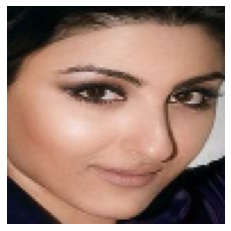

In [19]:
#Veamos la imagen #.astype('uint8')
test_image=np.array(data[1],dtype='float32')
plt.axis("off")
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()


### Dividir el dataset para el entrenamiento y la validaciòn

In [20]:
labels

array(['woman', 'woman', 'man', ..., 'man', 'man', 'man'], dtype='<U5')

In [21]:
#Tranformar las etiquetas 'man y 'woman' a enteros
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
labels

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
(x_train,x_test,y_train,y_test) = train_test_split(data,labels,test_size=0.2,random_state=42)

y_train = keras.utils.to_categorical(y_train,2)
y_test = keras.utils.to_categorical(y_test,2)

In [23]:
y_train.min() ## Tenemos en el entrenamiento la etiqueta mìnima 0

0.0

In [24]:
y_train.max() ## Tenemos en el entrenamiento la etiqueta mìnima 1

1.0

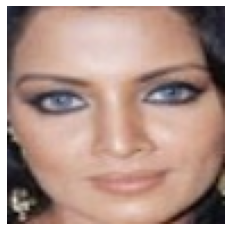

In [25]:
#Veamos una imagen del x_train #.astype('uint8')
x_train_image=np.array(x_train[100],dtype='float32')
plt.axis("off")
plt.imshow(cv2.cvtColor(x_train_image, cv2.COLOR_BGR2RGB))
plt.show()


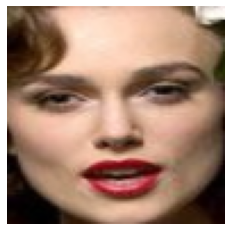

In [26]:
#Veamos una imagen del x_test #.astype('uint8')
x_train_image=np.array(x_test[100],dtype='float32')
plt.axis("off")
plt.imshow(cv2.cvtColor(x_train_image, cv2.COLOR_BGR2RGB))
plt.show()


In [27]:
x_test.shape

(462, 96, 96, 3)

In [28]:
#aug = ImageDataGenerator(rotation_range=25,width_shift_range=0.1,
#                        height_shift_range=0.1,shear_range=0.2,zoom_range=0.2,
#                        horizontal_flip=True, fill_mode="nearest")


In [29]:
#Hacemos reshape al array RGB para tener un solo array que represente la imagen
x_train.shape
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_train[1]

x_test.shape
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]*x_test.shape[3])
x_test[1]


array([0.55686275, 0.70588235, 0.9254902 , ..., 0.08235294, 0.03529412,
       0.01176471])

In [30]:
x_train.shape

(1845, 27648)

In [31]:
x_test.shape

(462, 27648)

In [32]:
#Escalaciòn de los valores
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(-0.5,0.5))

In [33]:
x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.fit_transform(x_test)

In [34]:
x_train_sc.shape

(1845, 27648)

In [35]:
x_test_sc.shape

(462, 27648)

##### Apartir de las imagenes que ya tenemos, generamos màs imagenes

In [36]:
#aug = ImageDataGenerator(rotation_range=25,width_shift_range=0.1,
#                        height_shift_range=0.1,shear_range=0.2,zoom_range=0.2,
#                        horizontal_flip=True, fill_mode="nearest")
#


## MODELADO

In [37]:
def buildModelSimple(dimInputs,entryLayerNeurons):
    model = Sequential()

    model.add(Dense (input_dim=dimInputs,units=entryLayerNeurons,activation='relu'))
    model.add(Dense(units=2,activation='sigmoid'))
    
    return model

In [38]:
def buildModel(width,height,depth,classes):
    model= Sequential()
    inputShape = (height,width,depth)
    chanDim=-1
    
    if (K.image_data_format() == "channels_first"): #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1
    
    # The axis that should be normalized, after a Conv2D layer with data_format="channels_first", 
    # set axis=1 in BatchNormalization.

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model


In [39]:
x_test_sc.shape

(462, 27648)

In [40]:
# build model
#model = buildModel(width=IMG_DIMS[0], height=IMG_DIMS[1], depth=IMG_DIMS[2],classes=2)
#opt = Adam(lr=LR, decay=LR/EPOCS)
#model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

model = buildModelSimple(x_test_sc.shape[1],60)
# compile the model
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=LR),metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=LR),metrics=['accuracy'])


### Entrenar el modelo

In [41]:
x_train_sc

array([[-0.44509804, -0.43333333, -0.40196078, ..., -0.13921569,
        -0.06862745,  0.15882353],
       [-0.19019608, -0.08039216,  0.08039216, ..., -0.32745098,
        -0.26078431, -0.09215686],
       [-0.4254902 , -0.4254902 , -0.4254902 , ..., -0.37843137,
        -0.37843137, -0.37843137],
       ...,
       [-0.23333333, -0.13529412, -0.04901961, ..., -0.34705882,
        -0.38627451, -0.0254902 ],
       [ 0.06862745,  0.16666667,  0.23333333, ..., -0.13529412,
         0.0254902 ,  0.15490196],
       [-0.48039216, -0.48823529, -0.48823529, ..., -0.00588235,
         0.02156863,  0.08431373]])

In [42]:
y_train

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [43]:
x_test_sc

array([[-0.17058824, -0.10392157, -0.0254902 , ..., -0.20196078,
        -0.13529412, -0.05294118],
       [ 0.05686275,  0.20588235,  0.4254902 , ..., -0.41764706,
        -0.46470588, -0.48823529],
       [-0.11568627, -0.1       , -0.02941176, ..., -0.42941176,
        -0.40196078, -0.34705882],
       ...,
       [-0.40196078, -0.40588235, -0.39019608, ...,  0.24117647,
         0.37843137,  0.49215686],
       [-0.33137255, -0.29607843, -0.21764706, ...,  0.26078431,
         0.26470588,  0.22941176],
       [-0.30784314, -0.31960784, -0.26862745, ..., -0.39411765,
        -0.3745098 , -0.34313725]])

In [44]:
y_test

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [45]:
x_train_sc.shape

(1845, 27648)

In [46]:
x_train_sc.shape[0]

1845

In [47]:
y_train.shape

(1845, 2)

In [48]:
x_test.shape

(462, 27648)

In [49]:
# train the model
#x_train_sc_extended=x_train_sc.reshape(x_train_sc.shape[0],IMG_DIMS[0],IMG_DIMS[1],IMG_DIMS[2])
#x_test_extended=x_test.reshape(x_test.shape[0],IMG_DIMS[0],IMG_DIMS[1],IMG_DIMS[2])

#history = model.fit_generator(aug.flow(x_train_sc_extended, y_train, batch_size=BATCH_SIZE), 
#                              validation_data=(x_test_extended,y_test),
#                              steps_per_epoch=len(x_train_sc_extended),
#                              epochs=EPOCS, verbose=1)

history=model.fit(x_train_sc,y_train,epochs=100,batch_size=BATCH_SIZE)
#history=model.fit(aug.flow(x_train, y_train, batch_size=32),batch_size=BATCH_SIZE)


    

Epoch 1/100
29/29 [==============================] - 1s 13ms/step - loss: 0.2256 - accuracy: 0.7089
Epoch 2/100
29/29 [==============================] - 0s 12ms/step - loss: 0.1246 - accuracy: 0.8285
Epoch 3/100
29/29 [==============================] - 0s 13ms/step - loss: 0.1033 - accuracy: 0.8628
Epoch 4/100
29/29 [==============================] - 0s 12ms/step - loss: 0.0916 - accuracy: 0.8783
Epoch 5/100
29/29 [==============================] - 0s 13ms/step - loss: 0.0734 - accuracy: 0.9090
Epoch 6/100
29/29 [==============================] - 0s 13ms/step - loss: 0.0604 - accuracy: 0.9267
Epoch 7/100
29/29 [==============================] - 0s 12ms/step - loss: 0.0400 - accuracy: 0.9468
Epoch 8/100
29/29 [==============================] - 0s 12ms/step - loss: 0.0510 - accuracy: 0.9328
Epoch 9/100
29/29 [==============================] - 0s 12ms/step - loss: 0.0287 - accuracy: 0.9667
Epoch 10/100
29/29 [==============================] - 0s 11ms/step - loss: 0.0321 - accuracy: 0.9601

29/29 [==============================] - 0s 14ms/step - loss: 0.0018 - accuracy: 0.9984
Epoch 82/100
29/29 [==============================] - 0s 13ms/step - loss: 0.0049 - accuracy: 0.9952
Epoch 83/100
29/29 [==============================] - 0s 13ms/step - loss: 0.0041 - accuracy: 0.9960
Epoch 84/100
29/29 [==============================] - 0s 12ms/step - loss: 0.0016 - accuracy: 0.9982
Epoch 85/100
29/29 [==============================] - 0s 12ms/step - loss: 0.0029 - accuracy: 0.9969
Epoch 86/100
29/29 [==============================] - 0s 12ms/step - loss: 0.0025 - accuracy: 0.9971
Epoch 87/100
29/29 [==============================] - 0s 12ms/step - loss: 0.0025 - accuracy: 0.9975
Epoch 88/100
29/29 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 0.9986
Epoch 89/100
29/29 [==============================] - 0s 12ms/step - loss: 0.0031 - accuracy: 0.9970
Epoch 90/100
29/29 [==============================] - 0s 12ms/step - loss: 0.0042 - accuracy: 0.9956
Epo

### Visualizaciòn de la clasificaciòn

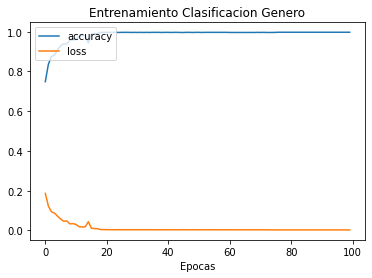

In [50]:
##Visualizacion de la clasificaciòn
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label='loss')
plt.title('Entrenamiento Clasificacion Genero')
plt.xlabel('Epocas')
plt.legend(loc='upper left')
plt.show()

### Salvar el modelo

In [51]:

# save the model to disk
model.save('gender_detection.model')


# save plot to disk
plt.savefig('plot.png')

INFO:tensorflow:Assets written to: gender_detection.model\assets


<Figure size 432x288 with 0 Axes>

###### Review following video:
https://www.youtube.com/watch?v=WOuAI5DhHyU

### Evaluar el modelo

In [52]:
#Evaluar el modelo
model.evaluate(x_test_sc,y_test,verbose=1)

15/15 [==============================] - 0s 3ms/step - loss: 0.0704 - accuracy: 0.9156


[0.07038882374763489, 0.9155844449996948]

### Predecir

In [53]:
def predictGender(testToPredict):
    toint=(model.predict(testToPredict)).round()
    int_test=toint.astype('int')
    categoria_predecida = int_test.argmax()
    print ("La categoria predecida es : ", categoria_predecida)

    if (categoria_predecida == 1):
        return 'Mujer'
    elif (categoria_predecida == 0):
        return 'Hombre'


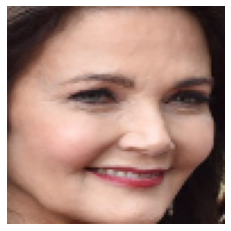

In [54]:
#Imagen a predecir
imgToPredict=x_test[2].reshape(IMG_DIMS[0],IMG_DIMS[1],IMG_DIMS[2])
x_train_image=np.array(imgToPredict,dtype='float32')
plt.axis("off")
plt.imshow(cv2.cvtColor(x_train_image, cv2.COLOR_BGR2RGB))
plt.show()

In [55]:
x_test[102].shape

(27648,)

In [56]:
testToPredict=x_test[2].reshape(1,IMG_DIMS[0]*IMG_DIMS[1]*IMG_DIMS[2])
testToPredict.shape

(1, 27648)

In [57]:
(model.predict(testToPredict)).round()

array([[0., 1.]], dtype=float32)

In [58]:
print ("La categoria predecida es : ", predictGender(testToPredict))

La categoria predecida es :  1
La categoria predecida es :  Mujer


In [ ]:
i = int(0)
for testToPredict in (x_test):
    imgToPredict=x_test[i].reshape(IMG_DIMS[0],IMG_DIMS[1],IMG_DIMS[2])
    x_train_image=np.array(imgToPredict,dtype='float32')
    plt.axis("off")
    #plt.imshow(cv2.cvtColor(x_train_image, cv2.COLOR_BGR2RGB))
    #plt.show()
    
    testToPredict=x_test[i].reshape(1,IMG_DIMS[0]*IMG_DIMS[1]*IMG_DIMS[2])
    print ("La categoria predecida es : ", predictGender(testToPredict))
    #time.sleep(2000)
    i=i+1